## 📦 Step 1: Importing Required Libraries
Before we do anything, let’s bring in all the libraries we’ll need — from handling data and plotting to building and evaluating our model.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


## 📥 Step 2: Load the Dataset
Let's load the famous Breast Cancer Wisconsin dataset from scikit-learn.

In [2]:
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target column
df['target'] = data.target

# Display the first few rows
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 📌 Step 3: Quick Overview of the Data
Let’s get a basic idea of the dataset — how many rows, columns, and any missing values.

In [3]:
# Basic info
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


## 📊 Step 4: Exploratory Data Analysis (EDA)
Let’s visualize the data to better understand how features differ between cancer classes (malignant vs benign).

/tmp/ipython-input-2775281859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


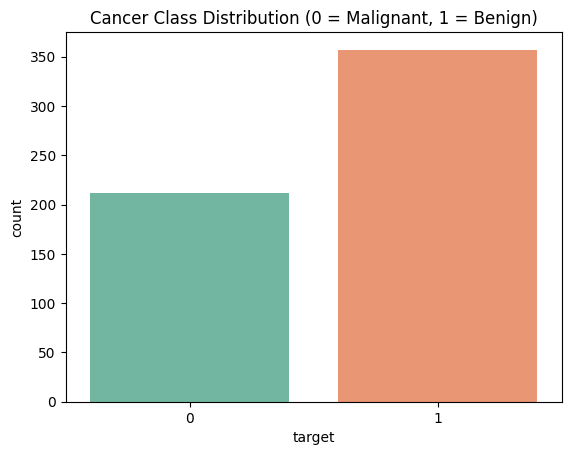

In [4]:
# Visualize class distribution
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Cancer Class Distribution (0 = Malignant, 1 = Benign)")
plt.show()


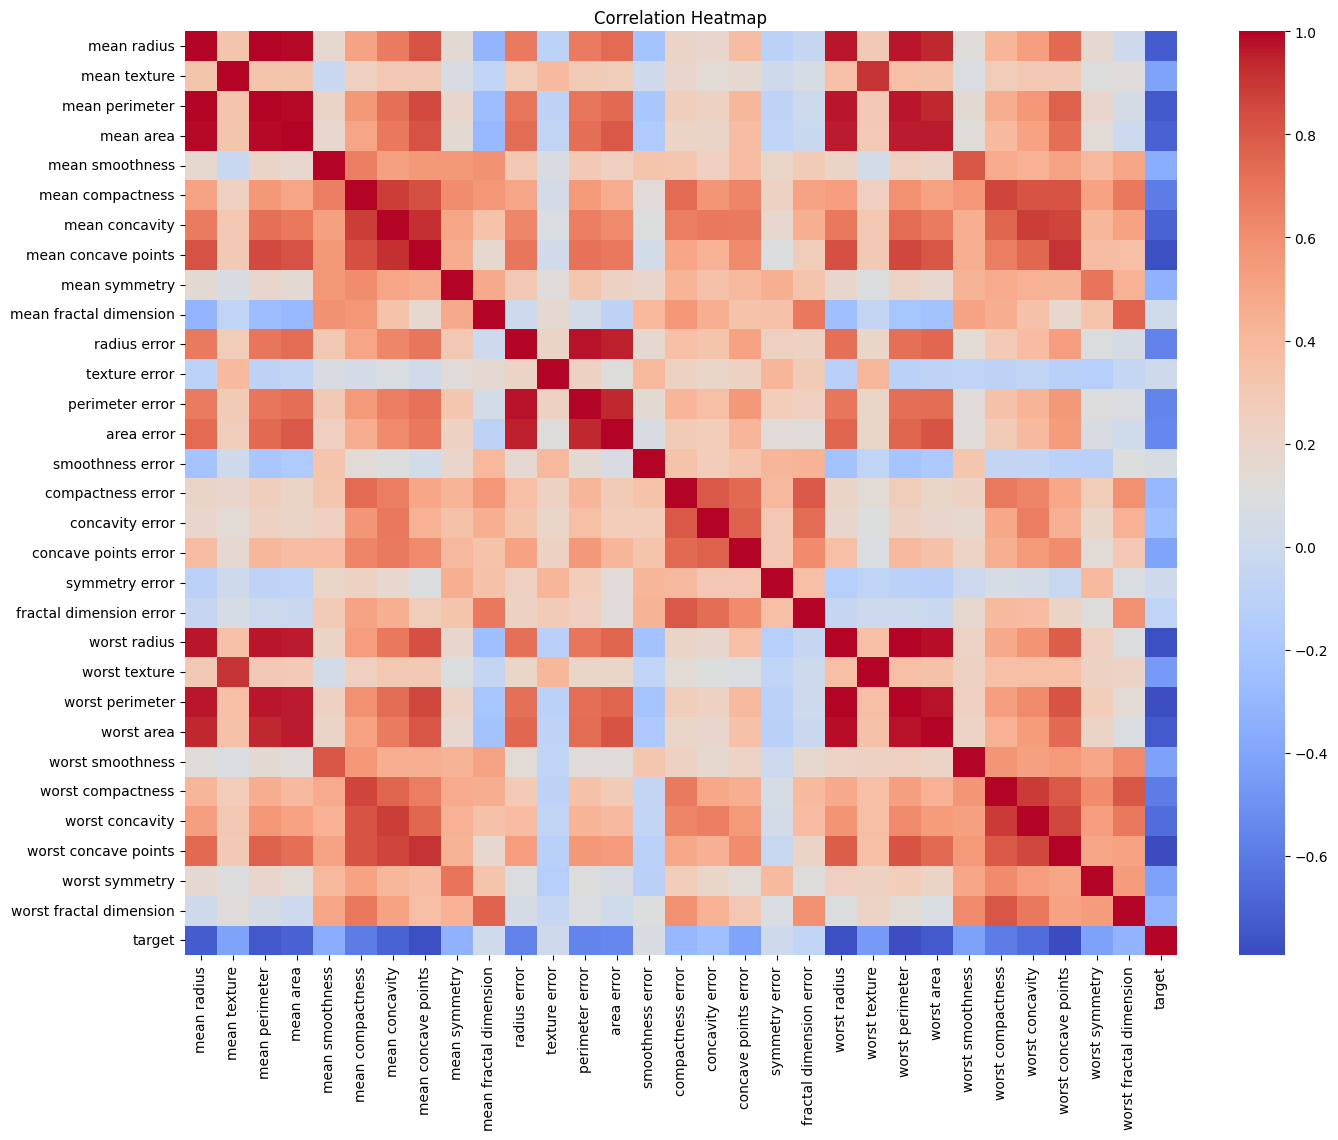

In [5]:
# Correlation heatmap
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


/tmp/ipython-input-2944093161.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='coolwarm')


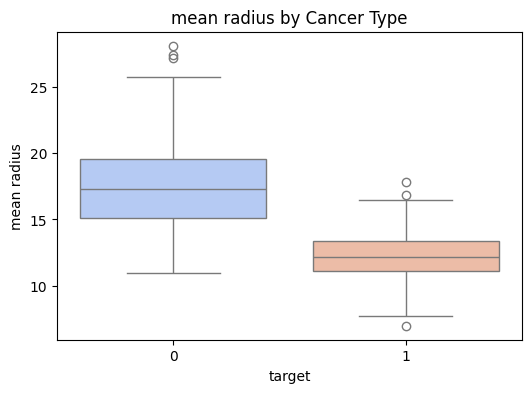

/tmp/ipython-input-2944093161.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='coolwarm')


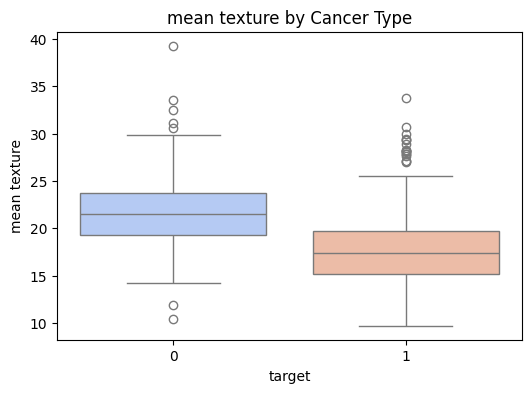

/tmp/ipython-input-2944093161.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='coolwarm')


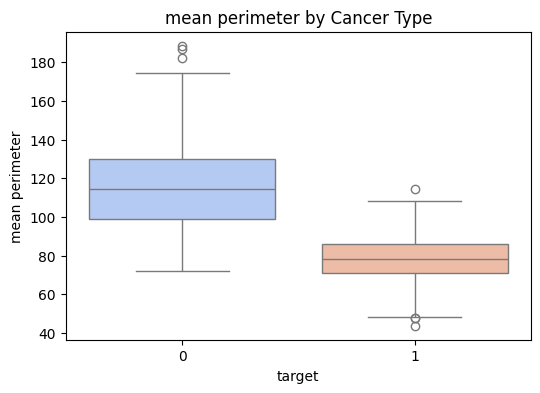

/tmp/ipython-input-2944093161.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='coolwarm')


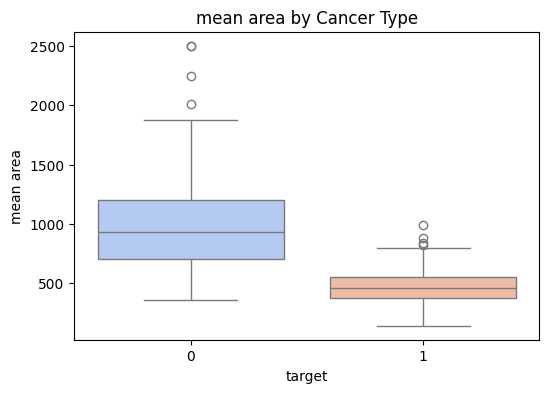

In [6]:
# Boxplots of a few important features by target class
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='target', y=feature, data=df, palette='coolwarm')
    plt.title(f'{feature} by Cancer Type')
    plt.show()


## ✂️ Step 5: Splitting the Data into Features and Labels
We’ll separate the features from the target labels so we can train the model.

In [7]:
# Separate X and y
X = df.drop('target', axis=1)
y = df['target']


## 🔀 Step 6: Train-Test Split
Let’s split the dataset so we can train on one portion and test how well it performs on the other.

In [8]:
# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## ⚖️ Step 7: Feature Scaling
SVMs are sensitive to feature scales — so let’s standardize the data.



In [9]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 🤖 Step 8: Training the Support Vector Machine Classifier
Now comes the fun part — training an SVM model on the breast cancer dataset.

In [10]:
# Create and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

## 📈 Step 9: Model Evaluation
Let’s see how the model performed on the test set.

In [11]:
# Predictions
y_pred = svm_model.predict(X_test_scaled)

# Accuracy and classification report
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred))


✅ Accuracy Score: 0.9736842105263158

📄 Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## 📌 Step 10: Confusion Matrix Visualization
A confusion matrix can help us understand the true/false positives and negatives.

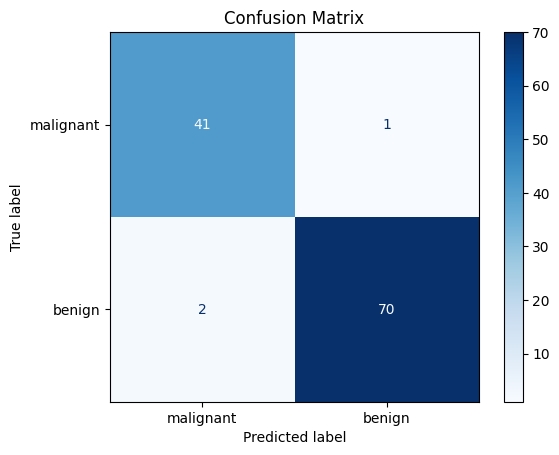

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


## 📉 Bonus Step: Visualizing the SVM Decision Boundary in 2D (Using PCA)
Since we can't visualize in 30D, we'll reduce the features to 2D using PCA and then draw the decision boundary.

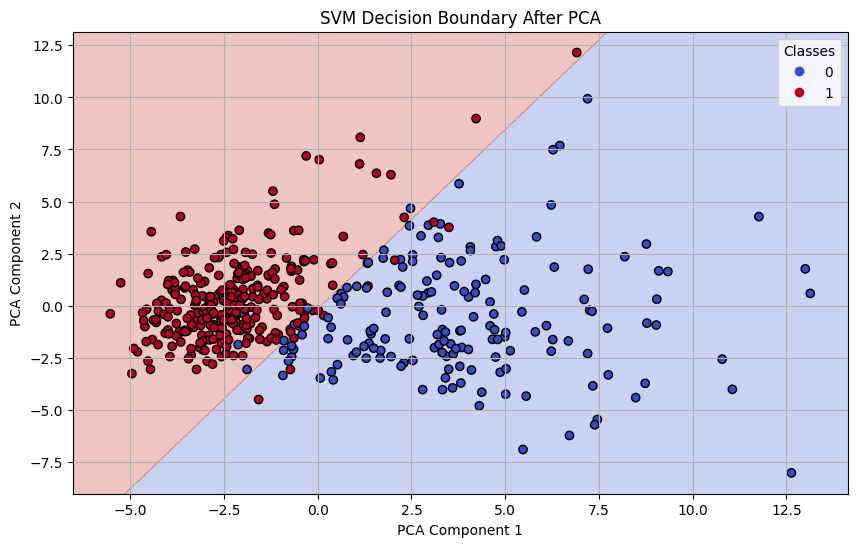

In [13]:
from sklearn.decomposition import PCA

# Reduce to 2 components for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train SVM on reduced data
svm_2d = SVC(kernel='linear')
svm_2d.fit(X_train_pca, y_train)

# Create a meshgrid
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                     np.linspace(y_min, y_max, 1000))

# Predict on meshgrid to draw decision boundary
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title("SVM Decision Boundary After PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


## 💾 Saving the Trained SVM Model & Scaler
We'll save both the SVM model and the StandardScaler so we can reload and use them later without retraining.

In [14]:
import joblib

# Save model and scaler
joblib.dump(svm_model, "svm_cancer_model.pkl")
joblib.dump(scaler, "svm_scaler.pkl")


['svm_scaler.pkl']